# PyTorch內建語音資料集測試

## 載入相關套件

In [1]:
import torch
import torchaudio
import IPython
from IPython.display import Audio
import matplotlib.pyplot as plt
import os
import math
import audio_util

## 下載 YES/NO 資料集，並建立 Dataset、DataLoader

In [2]:
yesno_data = torchaudio.datasets.YESNO('./audio', download=True)
data_loader = torch.utils.data.DataLoader(yesno_data,
                                  batch_size=1, shuffle=True)

100%|█████████████████████████████████████████████████████████████████████████████| 4.49M/4.49M [00:02<00:00, 1.94MB/s]


## 顯示第一筆資料

In [3]:
yesno_data[0]

(tensor([[ 3.0518e-05,  6.1035e-05,  3.0518e-05,  ..., -1.8616e-03,
          -2.2583e-03, -1.3733e-03]]),
 8000,
 [0, 0, 0, 0, 1, 1, 1, 1])

## 顯示頻譜及播放

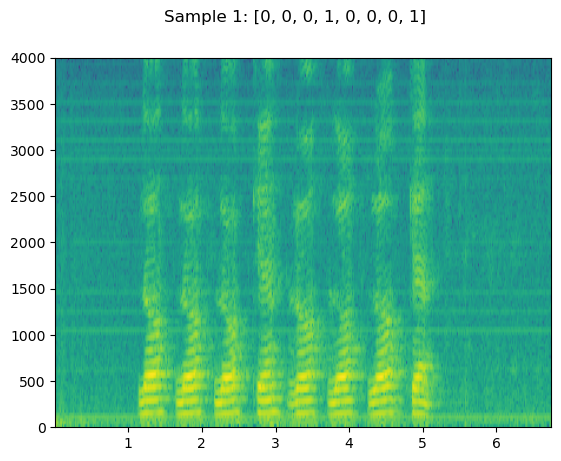

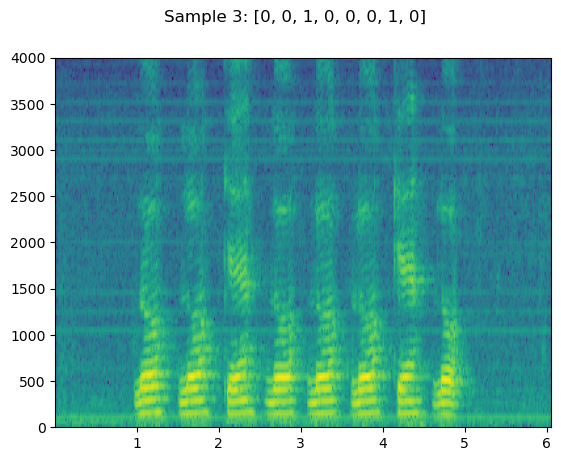

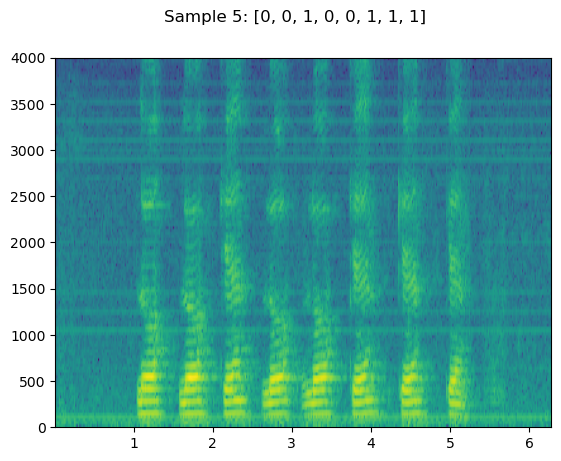

In [4]:
for i in [1, 3, 5]:
    waveform, sample_rate, label = yesno_data[i]
    audio_util.plot_specgram(waveform, sample_rate, title=f"Sample {i}: {label}")
    audio_util.play_audio(waveform, sample_rate)

## 存檔

In [8]:
wav_file = "./audio/yesno1.wav"
torchaudio.save(
    wav_file, yesno_data[0][0], yesno_data[0][1])
audio_util.inspect_file(wav_file)

----------
Source: ./audio/yesno1.wav
----------
 - File size: 203280 bytes
 - AudioMetaData(sample_rate=8000, num_frames=50800, num_channels=1, bits_per_sample=32, encoding=PCM_F)


## 播放音檔(wav)

In [9]:
# autoplay=True：自動播放，不須按 PLAY 鍵
IPython.display.Audio(wav_file, autoplay=False) 